<b><h1>Task 2:- Stock Market Prediction And Forecasting Using Stacked LSTM [LGMVIP]</h1><b>

<b><h4>Dataset:-https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv <h4></b>

<b><h2>Importing the libraries</h2><b>

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [5]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

<b><h2>Importing Dataset</h2></b>

In [29]:
data = pd.read_csv("/content/stock.csv")

In [30]:
data.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28/09/2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27/09/2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26/09/2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25/09/2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24/09/2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,21/09/2018,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,19/09/2018,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,18/09/2018,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,17/09/2018,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,14/09/2018,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [31]:
data.tail(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2025,03/08/2010,118.3,119.95,117.90,118.65,118.30,611234,726.78
2026,02/08/2010,117.3,118.50,116.60,118.10,117.30,663593,779.85
2027,30/07/2010,116.5,118.00,114.60,115.85,116.05,2656191,3112.68
2028,29/07/2010,112.5,121.70,112.50,117.50,116.60,2359134,2791.03
2029,28/07/2010,118.0,120.50,117.20,118.15,118.25,835593,994.01
2030,27/07/2010,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,26/07/2010,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,23/07/2010,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,22/07/2010,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,21/07/2010,122.1,123.00,121.05,121.10,121.55,658666,803.56


<b><h2>Used to view some basic statistical details</h2></b>

In [32]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


<b><h2>No of rows and columns</h2></b>

In [33]:
data.shape

(2035, 8)

<b><h2>Checking for null values</h2></b>

In [34]:
data.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


<b><h2>Returns the number of missing values in dataset</h2></b>

In [35]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

<b><h2>Returns the number of column</h2></b>

In [15]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

<b><h2>Returns the number of unique values for each column 

In [16]:
data.nunique()

Date                    2035
Open                    1165
High                    1257
Low                     1263
Last                    1268
Close                   1313
Total Trade Quantity    2034
Turnover (Lacs)         2030
dtype: int64

In [17]:
data.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [36]:
df = data.reset_index()['Open']
df

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64

Text(0.5, 1.0, 'Open')

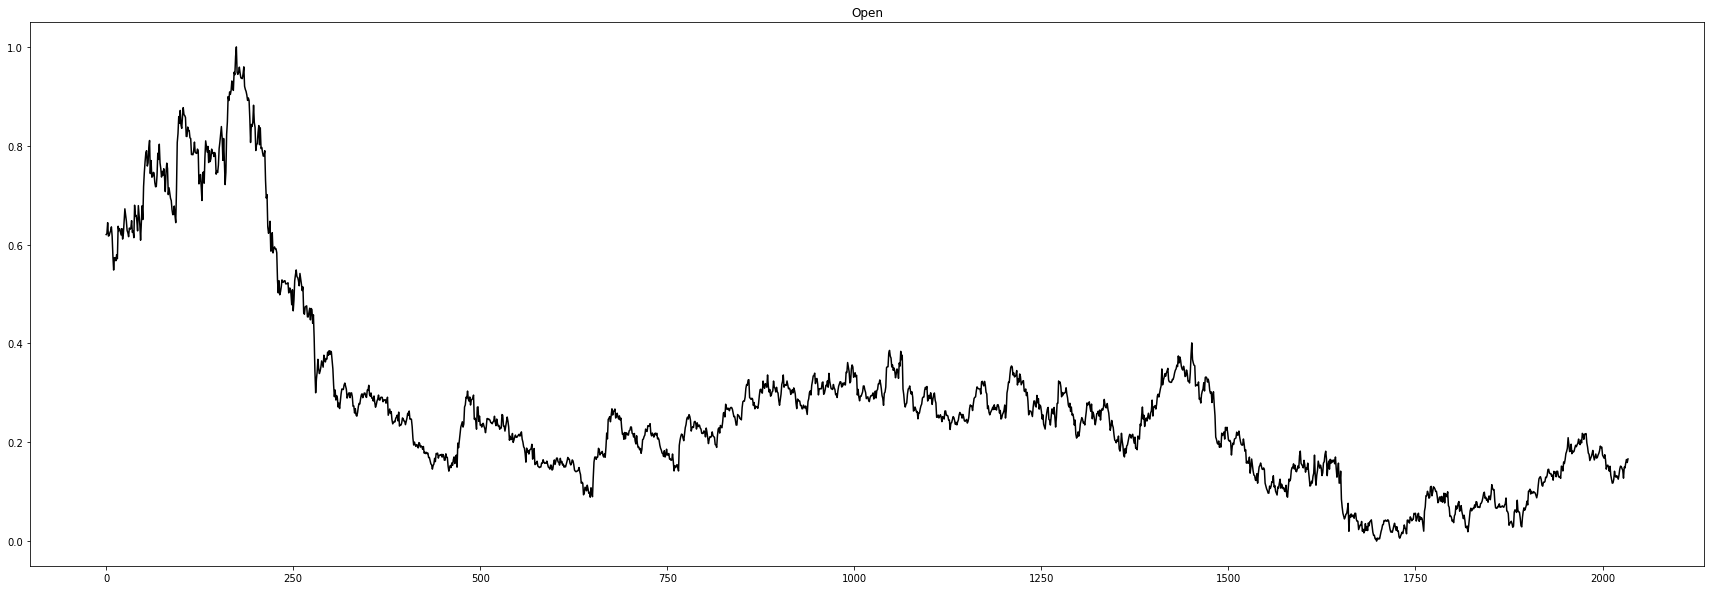

In [88]:
plt.subplots(figsize = (30,10))
plt.plot(df, color="black")
plt.title('Open')

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler(feature_range = (0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))
df.shape

(2035, 1)

In [41]:
print(df)

[[0.6202352 ]
 [0.62226277]
 [0.64436334]
 ...
 [0.16504461]
 [0.15896188]
 [0.16626115]]


<b><h2>Spliting the data into training and testing</h2></b>

In [42]:
training_size = int(len(df) * 0.75)
testing_size = len(df) - training_size
train_data, test_data = df[0 :training_size, :], df[training_size : len(df), :1]
training_size, testing_size

(1526, 509)

In [53]:
train_data, test_data

(array([[0.6202352 ],
        [0.62226277],
        [0.64436334],
        ...,
        [0.18491484],
        [0.15774534],
        [0.16180049]]), array([[0.15774534],
        [0.15774534],
        [0.16991079],
        [0.13746959],
        [0.14963504],
        [0.16605839],
        [0.15369019],
        [0.14152474],
        [0.13341444],
        [0.13260341],
        [0.12368208],
        [0.12246553],
        [0.13625304],
        [0.11719384],
        [0.13746959],
        [0.15004055],
        [0.15308191],
        [0.15794809],
        [0.15186537],
        [0.14557989],
        [0.14497161],
        [0.14801298],
        [0.14476886],
        [0.11719384],
        [0.11151663],
        [0.10563666],
        [0.10218978],
        [0.09712084],
        [0.09691809],
        [0.11131387],
        [0.10644769],
        [0.11111111],
        [0.1202352 ],
        [0.11922141],
        [0.13219789],
        [0.10969181],
        [0.11232766],
        [0.10097324],
        [0.0971208

<b><h2>Convert array of values into dataset 

In [44]:
def create_dataset(dataset, time_step=1):
  train_X, train_Y = [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    train_X.append(a)
    train_Y.append(dataset[i+time_step, 0])
  return np.array(train_X),np.array(train_Y)


In [45]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

<b><h3>Reshape the input to be [samples, time steps, features] which is the requirement of LSTM</h3></b> 

In [46]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)

In [47]:
print(x_train.shape), print(y_train.shape)

(1425, 100, 1)
(1425,)


(None, None)

In [48]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')


In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 5s 216ms/step - loss: 5.6487e-04 - val_loss: 7.3848e-04
Epoch 2/100
23/23 [==============================] - 5s 217ms/step - loss: 6.6519e-04 - val_loss: 5.6039e-04
Epoch 3/100
23/23 [==============================] - 5s 216ms/step - loss: 5.5987e-04 - val_loss: 5.9270e-04
Epoch 4/100
23/23 [==============================] - 5s 215ms/step - loss: 5.7042e-04 - val_loss: 4.0213e-04
Epoch 5/100
23/23 [==============================] - 5s 216ms/step - loss: 5.9345e-04 - val_loss: 6.9163e-04
Epoch 6/100
23/23 [==============================] - 5s 218ms/step - loss: 5.2077e-04 - val_loss: 6.8688e-04
Epoch 7/100
23/23 [==============================] - 6s 244ms/step - loss: 5.0947e-04 - val_loss: 5.7442e-04
Epoch 8/100
23/23 [==============================] - 6s 274ms/step - loss: 5.1246e-04 - val_loss: 5.5707e-04
Epoch 9/100
23/23 [==============================] - 5s 221ms/step - loss: 5.5984e-04 - val_loss: 6.4818e-04
Epoch 10/100
23/23 

In [56]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [58]:
from sklearn.metrics import mean_squared_error
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

print('RMSE performance matrics :', math.sqrt(mean_squared_error(y_train, train_predict)))

RMSE performance matrics : 40553.967420735


In [90]:
print('Test data RMSE :',math.sqrt(mean_squared_error(y_test, test_predict)))

Test data RMSE : 26396.83550847838


In [91]:
look_back = 100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot = np.empty_like(df)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df) - 1, :] = test_predict


<b><h2>Plot baseline</h2><b>

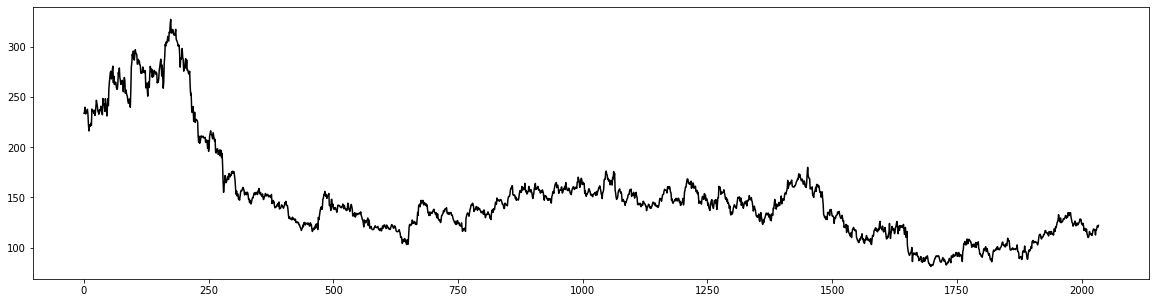

In [92]:
plt.subplots(figsize=(20,5))
plt.plot(scaler.inverse_transform(df), color = "black")
plt.show()

<b><h3>Training prediction and testing prediction</h3></b>

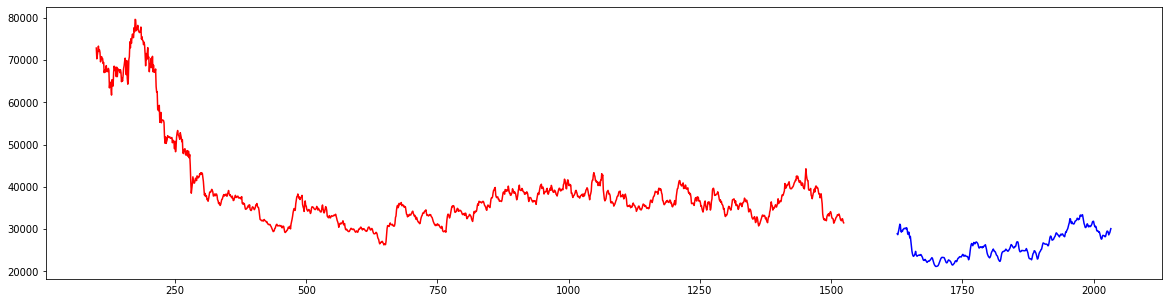

In [93]:
plt.subplots(figsize=(20,5))
plt.plot(trainPredictPlot,color ='red')
plt.plot(testPredictPlot, color ='blue')
plt.show()

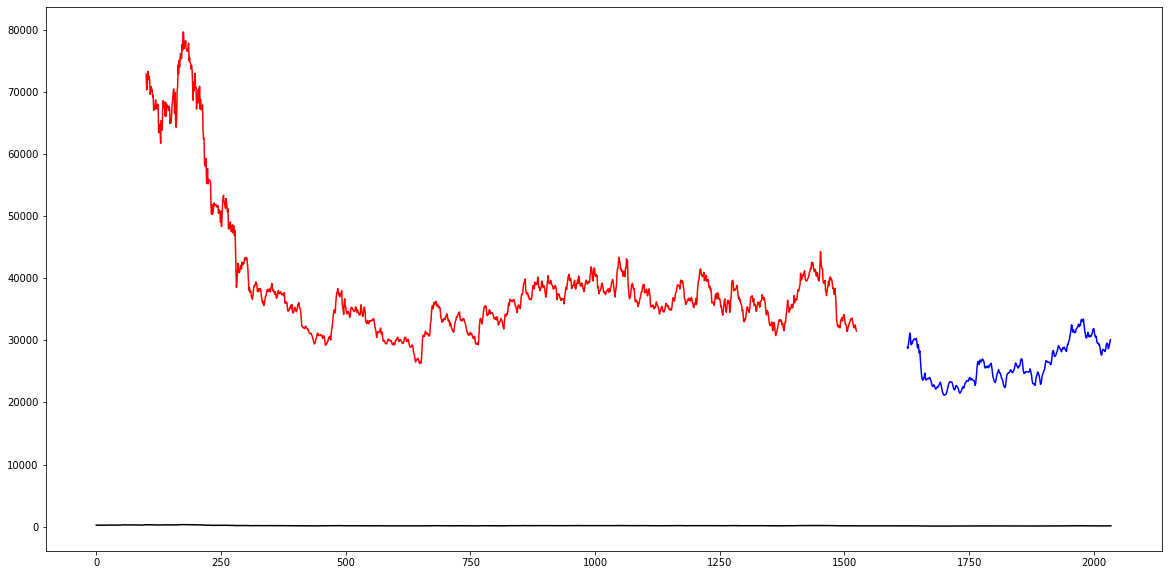

In [104]:
plt.subplots(figsize=(20,10))
plt.plot(scaler.inverse_transform(df), color= 'black')
plt.plot(trainPredictPlot, color='red')
plt.plot(testPredictPlot, color='blue')

In [95]:
print("Length of test data :", len(test_data))

Length of test data : 509


In [96]:
test_data.shape

(509, 1)

<b><h4> Taking previous 100 days data from test data prediction of future data </h4></b>

In [97]:
x_ip = test_data[409:].reshape(1,-1)
x_ip.shape

(1, 100)

In [98]:
temp_ip = list(x_ip)
temp_ip = temp_ip[0].tolist()

In [100]:
lst_output=[]
n_steps=100

future_Days=15

i=0

while(i<future_Days):
  if(len(temp_ip)>100):
    x_ip = np.array(temp_ip[1:])
    print("Day {} input {}".format(i,x_ip))

    x_ip = x_ip.reshape(1, -1)
    x_ip = x_ip.reshape(1, n_steps, 1)
    yhat = model.predict(x_ip, verbose=0)
    print("Day {} output {}\n".format(i,yhat))

    temp_ip.extend(yhat[0].tolist())
    temp_ip = temp_ip[1:]
    lst_output.extend(yhat.tolist())
    i=i+1

  else:
    x_ip = x_ip.reshape(1, n_steps, 1)
    yhat = model.predict(x_ip, verbose=0)
    print(yhat[0])
    temp_ip.extend(yhat[0].tolist())
    print(len(temp_ip))
    lst_output.extend(yhat.tolist())
    i=i+1






[0.16858807]
101
Day 1 input [0.13746959 0.13990268 0.13017032 0.14152474 0.14111922 0.13138686
 0.12915653 0.13098135 0.1269262  0.15166261 0.15004055 0.14193025
 0.16017843 0.15693431 0.16504461 0.1770073  0.18146796 0.18815896
 0.20924574 0.19424169 0.18106245 0.18207624 0.1960665  0.17680454
 0.18207624 0.18004866 0.18207624 0.18876723 0.19383617 0.19099757
 0.19505272 0.19809408 0.20640714 0.19748581 0.19525547 0.20437956
 0.19870235 0.21796431 0.21553122 0.20600162 0.21654501 0.21654501
 0.2175588  0.19870235 0.19018654 0.17802109 0.175588   0.16301703
 0.16707218 0.17112733 0.17639903 0.18349554 0.1717356  0.16423358
 0.16991079 0.17619627 0.16788321 0.16909976 0.17396594 0.17741281
 0.18268451 0.19221411 0.18896999 0.19018654 0.17396594 0.17092457
 0.16788321 0.17477697 0.16443633 0.14557989 0.15287916 0.15369019
 0.15044607 0.14152474 0.15145985 0.13341444 0.12530414 0.11719384
 0.11780211 0.12489862 0.14132198 0.13098135 0.12935929 0.13240065
 0.12895377 0.12530414 0.13381995

In [102]:
day_new = np.arange(1,101)
day_pred = np.arange(101,116)

fd= df.tolist()
fd.extend(lst_output)

In [103]:
len(df)

2035

In [107]:
2035-100

1935

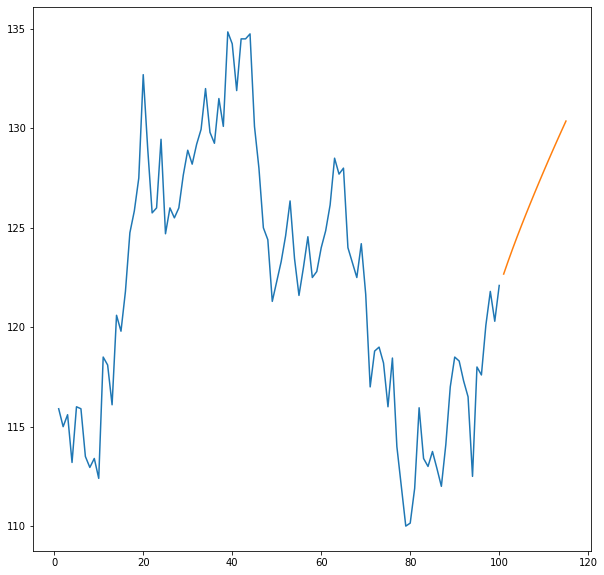

In [111]:
plt.subplots(figsize = (10,10))
plt.plot(day_new, scaler.inverse_transform(df[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))